In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [8]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.shape

(7043, 21)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df_new = df.drop(columns =["customerID"])
df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [19]:
df_new.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
# total charges needed in int

In [20]:
df_new = df_new[df_new.TotalCharges!=' ']
df_new.shape

(7032, 20)

In [21]:
df_new.TotalCharges = pd.to_numeric(df_new.TotalCharges)

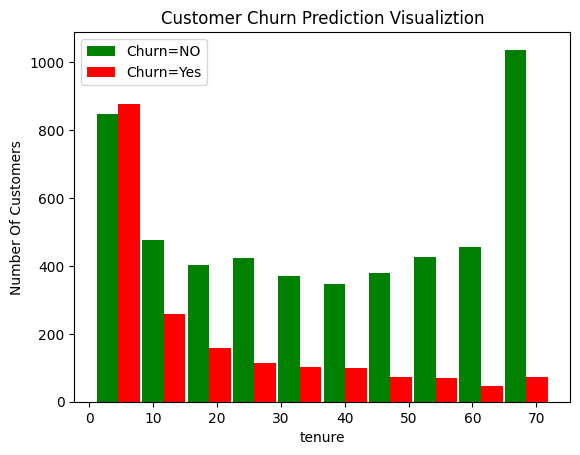

In [23]:
d = df_new[df_new['Churn']=='No'].tenure
d1 = df_new[df_new['Churn']=='Yes'].tenure
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([d,d1], rwidth=0.95, color=['green','red'],label=['Churn=NO','Churn=Yes'])
plt.legend()

<function matplotlib.pyplot.legend(*args, **kwargs)>

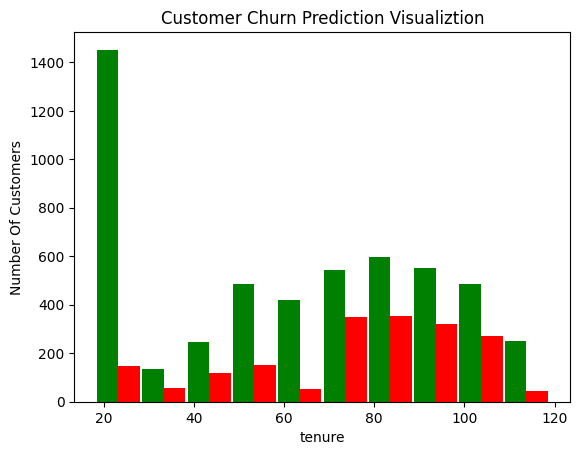

In [24]:
d = df_new[df_new['Churn']=='No'].MonthlyCharges
d1 = df_new[df_new['Churn']=='Yes'].MonthlyCharges
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([d,d1], rwidth=0.95, color=['green','red'],label=['Churn=NO','Churn=Yes'])
plt.legend

In [26]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 
print_unique_col_values(df_new)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [27]:
df_new.replace('No internet service','No',inplace=True)
df_new.replace('No phone service','No',inplace=True)

In [29]:
X = df_new.iloc[:,:-1]

In [31]:
X.shape

(7032, 19)

In [32]:
y = df_new.iloc[:,-1]

In [34]:
y.shape

(7032,)

In [39]:
le = LabelEncoder()

In [40]:
y = le.fit_transform(y)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
ohe_columns = ['gender','Partner','Dependents','PhoneService','MultipleLines',
               'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
               'StreamingTV','StreamingMovies','PaperlessBilling',
               'InternetService','Contract','PaymentMethod']

In [44]:
scale_columns = ['tenure','MonthlyCharges','TotalCharges']

In [46]:
ct= ColumnTransformer(transformers=[
    ("ohe", OneHotEncoder(sparse_output=False, drop='first',
                          dtype= np.float64, handle_unknown='ignore'),ohe_columns ),
    ("scale", StandardScaler(), scale_columns)
],remainder = 'passthrough')

In [47]:
X_train_t = ct.fit_transform(X_train)
X_test_t = ct.transform(X_test)

In [48]:
X_train_t.shape

(5625, 23)

In [59]:
model = keras.Sequential([
        keras.layers.Dense(40, input_dim=23, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(25, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation='sigmoid')
    ])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [63]:
model.fit(X_train_t, y_train, epochs=15)

Epoch 1/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8030 - loss: 0.4126
Epoch 2/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7989 - loss: 0.4255
Epoch 3/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8083 - loss: 0.4163
Epoch 4/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8009 - loss: 0.4162
Epoch 5/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7945 - loss: 0.4264
Epoch 6/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8063 - loss: 0.4218
Epoch 7/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8066 - loss: 0.4128
Epoch 8/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8097 - loss: 0.4165
Epoch 9/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8100 - loss: 0.4229
Epoch 10/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8100 - loss: 0.4103
Epoch 11/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8095 - loss: 0.4227
Epoch 12/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [61]:
from sklearn.metrics import confusion_matrix , classification_report

In [64]:
model.evaluate(X_test_t, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7909 - loss: 0.4289 


[0.435135155916214, 0.7903340458869934]

In [65]:
y_pred = model.predict(X_test_t)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [68]:
y_pred = y_pred.reshape(-1)

In [70]:
y_pred

array([0.00567601, 0.1008905 , 0.6572775 , ..., 0.08635688, 0.2198902 ,
       0.00116803], dtype=float32)

In [72]:
y_pred = np.round(y_pred)

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [75]:
cm = confusion_matrix(y_test, y_pred)

In [76]:
cm

array([[922, 111],
       [184, 190]])

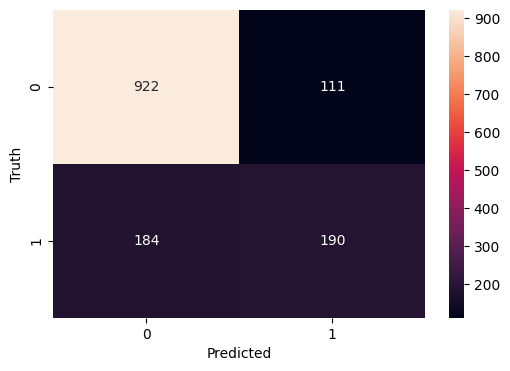

In [77]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()